<a href="https://colab.research.google.com/github/rejiba-fay/emagpy/blob/master/plot_04_pk43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Checkout www.pygimli.org for more examples

In [6]:
!pip install pygimli tetgen



# Field data inversion ("Koenigsee")

This minimalistic example shows how to use the Refraction Manager to invert
a field data set. Here, we consider the Koenigsee data set, which represents
classical refraction seismics data set with slightly heterogeneous overburden
and some high-velocity bedrock. The data file can be found in the [pyGIMLi
example data repository](https://github.com/gimli-org/example-data/blob/master/traveltime/koenigsee.sgt).


In [7]:
# We import pyGIMLi and the traveltime module.

import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.physics.traveltime as tt

In [ ]:
data =

The helper function `pg.getExampleData` downloads the data set to a temporary
location and loads it. Printing the data reveals that there are 714 data
points using 63 sensors (shots and geophones) with the data columns s (shot),
g (geophone), and t (traveltime). By default, there is also a validity flag.



In [8]:
data = pg.getExampleData("/content/sample_data/refrapy_plateau_picks V3.sgt", verbose=True)
print(data)

INFO:pyGIMLi:Looking for /content/sample_data/refrapy_plateau_picks V3.sgt in gimli-org/example-data/
22/08/24 - 16:20:42 - pyGIMLi - INFO - Looking for /content/sample_data/refrapy_plateau_picks V3.sgt in gimli-org/example-data/
INFO:pyGIMLi:File already exists: /content/sample_data/refrapy_plateau_picks V3.sgt
22/08/24 - 16:20:42 - pyGIMLi - INFO - File already exists: /content/sample_data/refrapy_plateau_picks V3.sgt
INFO:pyGIMLi:Reading /content/sample_data/refrapy_plateau_picks V3.sgt (<function load at 0x7a0c802948b0>)
22/08/24 - 16:20:42 - pyGIMLi - INFO - Reading /content/sample_data/refrapy_plateau_picks V3.sgt (<function load at 0x7a0c802948b0>)


Data: Sensors: 37 data: 152, nonzero entries: ['g', 's', 't', 'valid']


Let's have a look at the data in the form of traveltime curves.



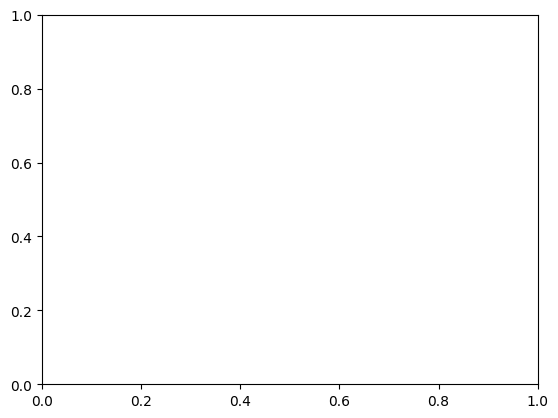

In [9]:
fig, ax = plt.subplots()
lines = tt.drawFirstPicks(ax, data)

We initialize the refraction manager.



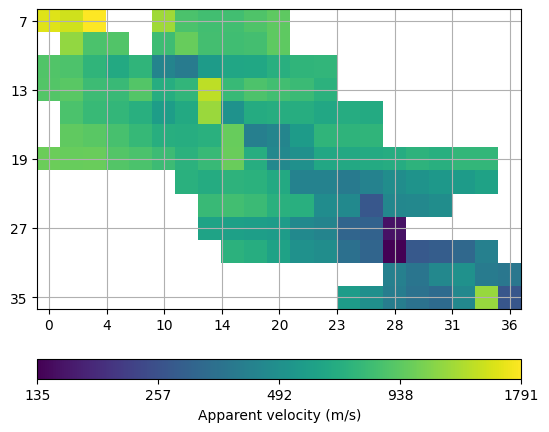

In [10]:
mgr = tt.TravelTimeManager(data)

# Alternatively, one can plot a matrix plot of apparent velocities which is the
# more general function also making sense for crosshole data.

ax, cbar = mgr.showData()

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly.



In [11]:
mgr.invert(secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=500, vBottom=5000, verbose=1)

INFO:pyGIMLi:Found 1 regions.
22/08/24 - 16:20:55 - pyGIMLi - INFO - Found 1 regions.
INFO:pyGIMLi:Found 1 regions.
22/08/24 - 16:20:55 - pyGIMLi - INFO - Found 1 regions.
ERROR:pyGIMLi:<class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
22/08/24 - 16:20:55 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
INFO:pyGIMLi:Creating forward mesh from region infos.
22/08/24 - 16:20:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
INFO:pyGIMLi:Creating refined mesh (secnodes: 3) to solve forward task.
22/08/24 - 16:20:55 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
INFO:pyGIMLi:Create gradient starting model. 500: 5000
22/08/24 - 16:20:56 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
INFO:pyGIMLi:Cre

fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x7a0c800a19e0>
Data transformation: <pgcore.libs._pygimli_.RTrans object at 0x7a0c800a1c60>
Model transformation (cumulative):
	 0 <pgcore.libs._pygimli_.RTransLogLU object at 0x7a0c705c3370>
min/max (data): 0.0011/0.04
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  263.81
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   37.94 (dPhi = 85.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   19.04 (dPhi = 48.28%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   14.60 (dPhi = 22.54%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   13.10 (dPhi

894 [675.3328245707916,...,1703.096597682029]

Look at the fit between measured (crosses) and modelled (lines) traveltimes.



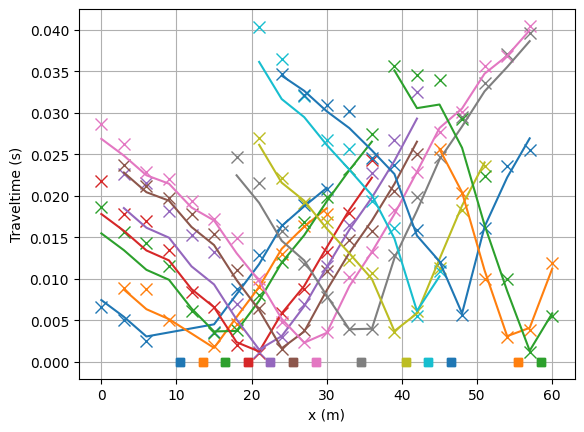

In [12]:
mgr.showFit(firstPicks=True)

You can plot only the model and customize with a bunch of keywords



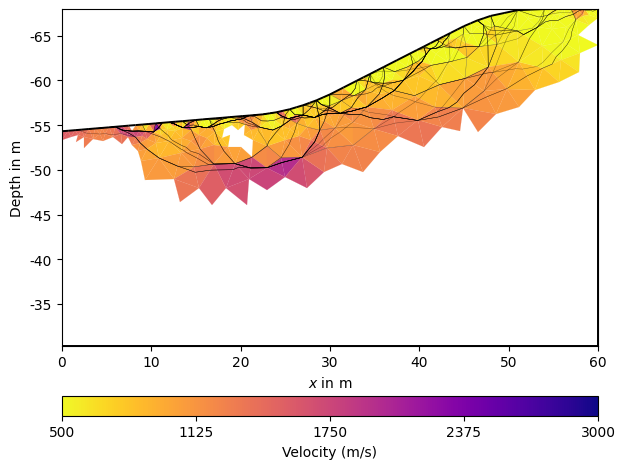

In [13]:
ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, cMap="plasma_r",
                          coverage=mgr.standardizedCoverage())
rays = mgr.drawRayPaths(ax=ax, color="k", lw=0.3, alpha=0.5)

# mgr.coverage() yields the ray coverage in m and standardizedCoverage as 0/1

You can play around with the gradient starting model (`vTop` and `vBottom`
arguments) and the regularization strength `lam` and customize the mesh.

